<a href="https://colab.research.google.com/github/kgovindaraju123/AIML/blob/master/Mar4SpacyVijay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SpaCY architecture**




The central data structures in spaCy are the Doc and the Vocab. The Doc object owns the sequence of tokens and all their annotations. The Vocab object owns a set of look-up tables that make common information available across documents. By centralizing strings, word vectors and lexical attributes, we avoid storing multiple copies of this data. This saves memory, and ensures there’s a single source of truth.

Text annotations are also designed to allow a single source of truth: the Doc object owns the data, and Span and Token are views that point into it. The Doc object is constructed by the Tokenizer, and then modified in place by the components of the pipeline. The Language object coordinates these components. It takes raw text and sends it through the pipeline, returning an annotated document. It also orchestrates training and serialization.

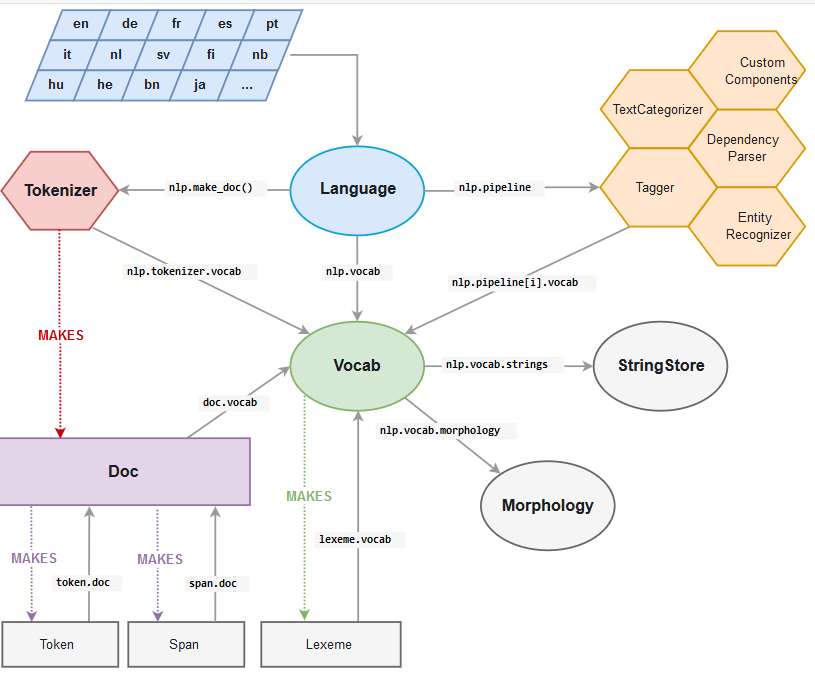

Spacy Open Source Library Update Installation


In [0]:
!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

     |████████████████████████████████| 12.0MB 1.7MB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.0-cp36-none-any.whl size=12019125 sha256=23bf92e03dce52f2e70bb73638ed0ba08c0908207e58eddb709005cb0df355bc
  Stored in directory: /root/.cache/pip/wheels/48/5c/1c/15f9d02afc8221a668d2172446dd8467b20cdb9aef80a172a4
Successfully built en-core-web-sm


In [0]:
!python3 -m spacy download en_core_web_md


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


Spacy



spaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python.paCy is designed specifically for production use and helps you build applications that process and “understand” large volumes of text. It can be used to build information extraction or natural language understanding systems, or to pre-process text for deep learning.

SpaCy Features:

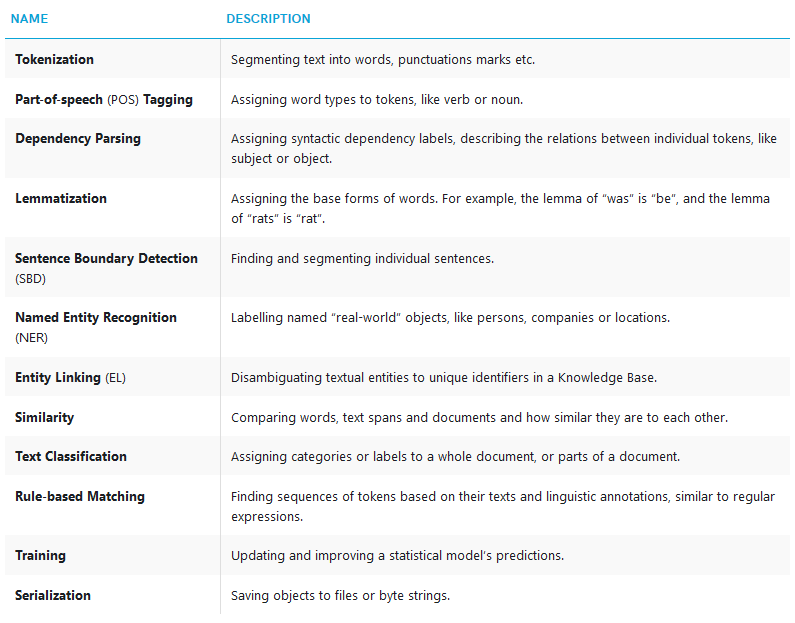

Spacy Models:
The models directory includes two types of pretrained models:

**Core models**: General-purpose pretrained models to predict named entities, part-of-speech tags and syntactic dependencies. Can be used out-of-the-box and fine-tuned on more specific data.

**Starter models**: Transfer learning starter packs with pretrained weights you can initialize your models with to achieve better accuracy. They can include word vectors (which will be used as features during training) or other pretrained representations like BERT. These models don’t include components for specific tasks like NER or text classification and are intended to be used as base models when training your own models.

Named entity recognition (NER) , also known as entity chunking/extraction , is a popular technique used in information extraction to identify and segment the named entities and classify or categorize them under various predefined classes. 

In any text document, there are particular terms that represent specific entities that are more informative and have a unique context. These entities are known as named entities , which more specifically refer to terms that represent real-world objects like people, places, organizations, and so on, which are often denoted by proper names. A naive approach could be to find these by looking at the noun phrases in text documents. Named entity recognition (NER) , also known as entity chunking/extraction , is a popular technique used in information extraction to identify and segment the named entities and classify or categorize them under various predefined classes.

SpaCy has some excellent capabilities for named entity recognition

In [0]:
import spacy
nlp = spacy.load("en_core_web_sm") #pretrained model
doc = nlp ("Apple is looking at buying U.K Startup for $1 billion")
for token in doc:
  print(token.text,token.pos_,token.dep_)

Apple PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.K PROPN compound
Startup PROPN dobj
for ADP prep
$ SYM quantmod
1 NUM compound
billion NUM pobj


Tokenization:

In [0]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 Billion")
for token in doc:
  print(token.text)

Apple
is
looking
at
buying
U.K.
startup
for
$
1
Billion


First, the raw text is split on whitespace characters, similar to text.split(' '). Then, the tokenizer processes the text from left to right. On each substring, it performs two checks:

Does the substring match a tokenizer exception rule? For example, “don’t” does not contain whitespace, but should be split into two tokens, “do” and “n’t”, while “U.K.” should always remain one token.

Can a prefix, suffix or infix be split off? For example punctuation like commas, periods, hyphens or quotes.

Part - of - Speech tags and dependencies

In [0]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
doc =nlp ("Apple is looking at buying U.K. startup for $1 billion")
#displacy.serve(doc, style="dep")
for token in doc:
  print(token.text,token.lemma_,token.pos_,token.tag_,token.dep_,token.shape_,token.is_alpha,token.is_stop)

Apple Apple PROPN NNP nsubj Xxxxx True False
is be AUX VBZ aux xx True True
looking look VERB VBG ROOT xxxx True False
at at ADP IN prep xx True True
buying buy VERB VBG pcomp xxxx True False
U.K. U.K. PROPN NNP compound X.X. False False
startup startup NOUN NN dobj xxxx True False
for for ADP IN prep xxx True True
$ $ SYM $ quantmod $ False False
1 1 NUM CD compound d False False
billion billion NUM CD pobj xxxx True False


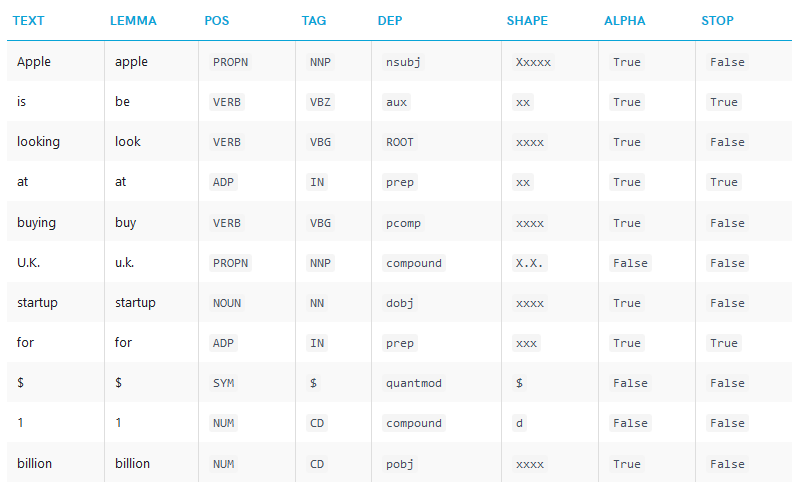

Visualizers: Visualize dependencies and entities in your browser or in a notebook

In [0]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("This is a sentence.")
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

Visualizing Long Text

In [0]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
text = """In ancient Rome, some neighbors live in three adjacent houses. In the center is the house of Senex, who lives there with wife Domina, son Hero, and several slaves, including head slave Hysterium and the musical's main character Pseudolus. A slave belonging to Hero, Pseudolus wishes to buy, win, or steal his freedom. One of the neighboring houses is owned by Marcus Lycus, who is a buyer and seller of beautiful women; the other belongs to the ancient Erronius, who is abroad searching for his long-lost children (stolen in infancy by pirates). One day, Senex and Domina go on a trip and leave Pseudolus in charge of Hero. Hero confides in Pseudolus that he is in love with the lovely Philia, one of the courtesans in the House of Lycus (albeit still a virgin)."""
doc = nlp(text)
sentence_spans = list(doc.sents)
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

Named Entities:A named entity is a “real-world object” that’s assigned a name – for example, a person, a country, a product or a book title. spaCy can recognize various types of named entities in a document, by asking the model for a prediction. Because models are statistical and strongly depend on the examples they were trained on, this doesn’t always work perfectly and might need some tuning later, depending on your use case.

Named-entity recognition is a subtask of information extraction that seeks to locate and classify named entity mentioned in unstructured text into pre-defined categories such as person names, organizations, locations, medical codes, time expressions, quantities, monetary values, percentages, etc

In [0]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)
    displacy.render(doc, style='ent', jupyter=True, options={'distance': 90})

Apple 0 5 ORG


U.K. 27 31 GPE


$1 billion 44 54 MONEY


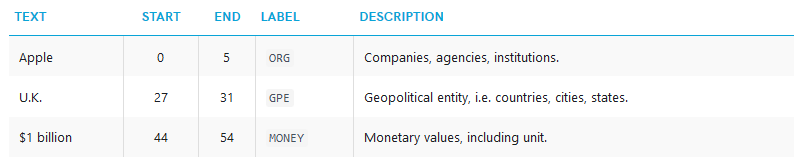

Named Entity Recognition

In [0]:
import spacy
from spacy import displacy

text = "When Sebastian Thrun started working on self-driving cars at Google in 2007, few people outside of the company took him seriously."

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
displacy.render(doc, style='ent', jupyter=True, options={'distance': 90})

Similarity is determined by comparing word vectors or “word embeddings”, multi-dimensional meaning representations of a word. Word vectors can be generated using an algorithm like word2vec and usually look like this:

In [0]:
import spacy
import en_core_web_md
nlp = spacy.load("en_core_web_md")
tokens = nlp("dog cat banana afskfsd")

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

dog True 7.0336733 False
cat True 6.6808186 False
banana True 6.700014 False
afskfsd False 0.0 True


The words “dog”, “cat” and “banana” are all pretty common in English, so they’re part of the model’s vocabulary, and come with a vector. The word “afskfsd” on the other hand is a lot less common and out-of-vocabulary – so its vector representation consists of 300 dimensions of 0, which means it’s practically nonexistent. If your application will benefit from a large vocabulary with more vectors, you should consider using one of the larger models or loading in a full vector package, for example, en_vectors_web_lg, which includes over 1 million unique vectors.

Using Similarity():
spaCy is able to compare two objects, and make a prediction of how similar they are. Predicting similarity is useful for building recommendation systems or flagging duplicates. For example, you can suggest a user content that’s similar to what they’re currently looking at, or label a support ticket as a duplicate if it’s very similar to an already existing one.

Each Doc, Span and Token comes with a .similarity()
method that lets you compare it with another object, and determine the similarity. Of course similarity is always subjective – whether “dog” and “cat” are similar really depends on how you’re looking at it. spaCy’s similarity model usually assumes a pretty general-purpose definition of similarity.

In [0]:
import spacy

nlp = spacy.load("en_core_web_md")  # make sure to use larger model!
tokens = nlp("dog cat banana")

for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

Pipelines:
When you call nlp on a text, spaCy first tokenizes the text to produce a Doc object. The Doc is then processed in several different steps – this is also referred to as the processing pipeline. The pipeline used by the default models consists of a tagger, a parser and an entity recognizer. Each pipeline component returns the processed Doc, which is then passed on to the next component.
The processing pipeline

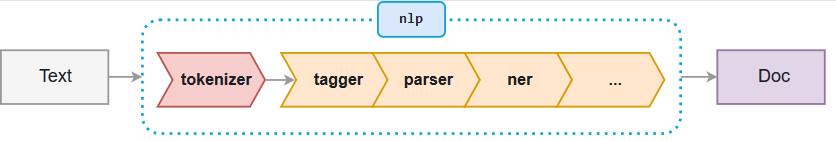

Vocab, Hashes and Lexemes

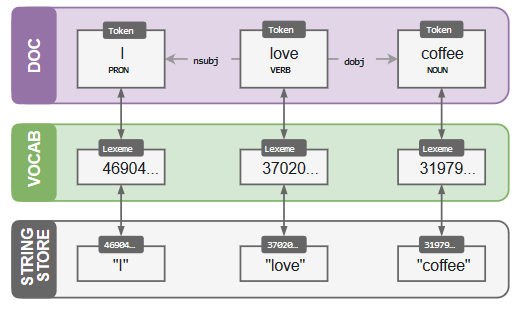

Whenever possible, spaCy tries to store data in a vocabulary, the Vocab, that will be shared by multiple documents. To save memory, spaCy also encodes all strings to hash values – in this case for example, “coffee” has the hash 3197928453018144401. Entity labels like “ORG” and part-of-speech tags like “VERB” are also encoded. Internally, spaCy only “speaks” in hash values.

In [0]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("I love coffee")
print(doc.vocab.strings["coffee"])  # 3197928453018144401
print(doc.vocab.strings[3197928453018144401])  # 'coffee'

If you process lots of documents containing the word “coffee” in all kinds of different contexts, storing the exact string “coffee” every time would take up way too much space. So instead, spaCy hashes the string and stores it in the StringStore. You can think of the StringStore as a lookup table that works in both directions – you can look up a string to get its hash, or a hash to get its string:

Now that all strings are encoded, the entries in the vocabulary don’t need to include the word text themselves. Instead, they can look it up in the StringStore via its hash value. Each entry in the vocabulary, also called Lexeme, contains the context-independent information about a word. For example, no matter if “love” is used as a verb or a noun in some context, its spelling and whether it consists of alphabetic characters won’t ever change. Its hash value will also always be the same.

In [0]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("I love coffee")
for word in doc:
    lexeme = doc.vocab[word.text]
    print(lexeme.text, lexeme.orth, lexeme.shape_, lexeme.prefix_, lexeme.suffix_,
            lexeme.is_alpha, lexeme.is_digit, lexeme.is_title, lexeme.lang_)

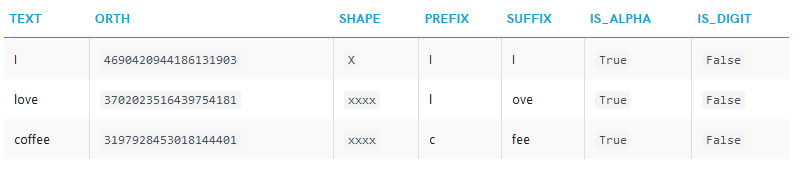

Knowledge Base

A knowledge base is created by first adding all entities to it. Next, for each potential mention or alias, a list of relevant KB IDs and their prior probabilities is added. The sum of these prior probabilities should never exceed 1 for any given alias.

In [0]:
import spacy
from spacy.kb import KnowledgeBase

# load the model and create an empty KB
nlp = spacy.load('en_core_web_sm')
kb = KnowledgeBase(vocab=nlp.vocab, entity_vector_length=3)

# adding entities
kb.add_entity(entity="Q1004791", freq=6, entity_vector=[0, 3, 5])
kb.add_entity(entity="Q42", freq=342, entity_vector=[1, 9, -3])
kb.add_entity(entity="Q5301561", freq=12, entity_vector=[-2, 4, 2])

# adding aliases
kb.add_alias(alias="Douglas", entities=["Q1004791", "Q42", "Q5301561"], probabilities=[0.6, 0.1, 0.2])
kb.add_alias(alias="Douglas Adams", entities=["Q42"], probabilities=[0.9])

print()
print("Number of entities in KB:",kb.get_size_entities()) # 3
print("Number of aliases in KB:", kb.get_size_aliases()) # 2

Training:

spaCy’s models are statistical and every “decision” they make – for example, which part-of-speech tag to assign, or whether a word is a named entity – is a prediction. This prediction is based on the examples the model has seen during training. To train a model, you first need training data – examples of text, and the labels you want the model to predict. This could be a part-of-speech tag, a named entity or any other information.

The model is then shown the unlabelled text and will make a prediction. Because we know the correct answer, we can give the model feedback on its prediction in the form of an error gradient of the loss function that calculates the difference between the training example and the expected output. The greater the difference, the more significant the gradient and the updates to our model.

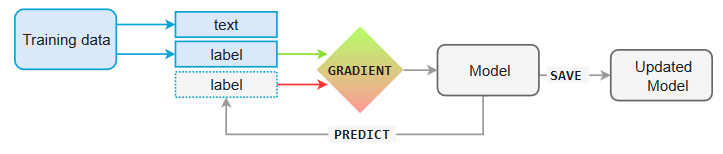

When training a model, we don’t just want it to memorize our examples – we want it to come up with a theory that can be generalized across other examples. After all, we don’t just want the model to learn that this one instance of “Amazon” right here is a company – we want it to learn that “Amazon”, in contexts like this, is most likely a company. That’s why the training data should always be representative of the data we want to process. A model trained on Wikipedia, where sentences in the first person are extremely rare, will likely perform badly on Twitter. Similarly, a model trained on romantic novels will likely perform badly on legal text.

This also means that in order to know how the model is performing, and whether it’s learning the right things, you don’t only need training data – you’ll also need evaluation data. If you only test the model with the data it was trained on, you’ll have no idea how well it’s generalizing. If you want to train a model from scratch, you usually need at least a few hundred examples for both training and evaluation. To update an existing model, you can already achieve decent results with very few examples – as long as they’re representative.

**Language Data**

Every language is different – and usually full of exceptions and special cases, especially amongst the most common words. Some of these exceptions are shared across languages, while others are entirely specific – usually so specific that they need to be hard-coded. The lang

module contains all language-specific data, organized in simple Python files. This makes the data easy to update and extend.

The shared language data in the directory root includes rules that can be generalized across languages – for example, rules for basic punctuation, emoji, emoticons, single-letter abbreviations and norms for equivalent tokens with different spellings, like " and ”. This helps the models make more accurate predictions. The individual language data in a submodule contains rules that are only relevant to a particular language. It also takes care of putting together all components and creating the Language subclass – for example, English or German.

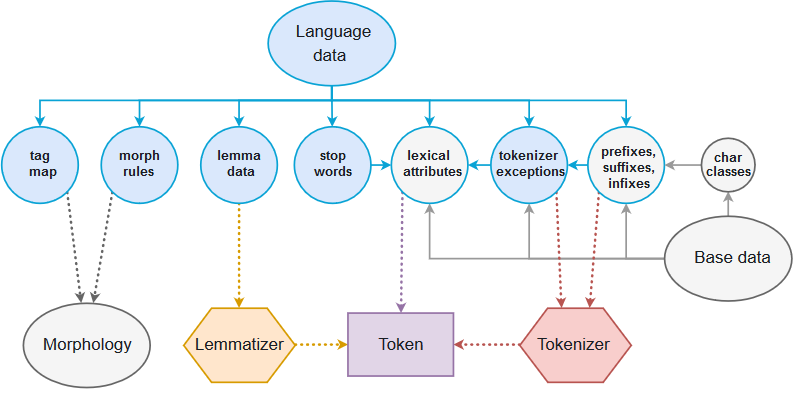

Spacy Lab Example:

In [0]:
!python -m spacy download en_core_web_sm
!python -m spacy download de_core_news_sm

Process Text:

In [0]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Hello, world. Here are two sentences.")
print([t.text for t in doc])

nlp_de = spacy.load("de_core_news_sm")
doc_de = nlp_de("Ich bin ein Berliner.")
print([t.text for t in doc_de])

Get Tokens, Chunks and Nouns

In [0]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Peach emoji is where it has always been. Peach is the superior "
          "emoji. It's outranking eggplant 🍑 ")
print(doc[0].text)          # 'Peach'
print(doc[1].text)          # 'emoji'
print(doc[-1].text)         # '🍑'
print(doc[17:19].text)      # 'outranking eggplant'

noun_chunks = list(doc.noun_chunks)
print(noun_chunks[0].text)  # 'Peach emoji'

sentences = list(doc.sents)
assert len(sentences) == 3
print(sentences[1].text)    # 'Peach is the superior emoji.'

Get parts of Speech,tags and Flags

In [0]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
apple = doc[0]
print("Fine-grained POS tag", apple.pos_, apple.pos)
print("Coarse-grained POS tag", apple.tag_, apple.tag)
print("Word shape", apple.shape_, apple.shape)
print("Alphabetic characters?", apple.is_alpha)
print("Punctuation mark?", apple.is_punct)

billion = doc[10]
print("Digit?", billion.is_digit)
print("Like a number?", billion.like_num)
print("Like an email address?", billion.like_email)

Use Hash Value for every String

In [0]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("I love coffee")

coffee_hash = nlp.vocab.strings["coffee"]  # 3197928453018144401
coffee_text = nlp.vocab.strings[coffee_hash]  # 'coffee'
print(coffee_hash, coffee_text)
print(doc[2].orth, coffee_hash)  # 3197928453018144401
print(doc[2].text, coffee_text)  # 'coffee'

beer_hash = doc.vocab.strings.add("beer")  # 3073001599257881079
beer_text = doc.vocab.strings[beer_hash]  # 'beer'
print(beer_hash, beer_text)

unicorn_hash = doc.vocab.strings.add("🦄")  # 18234233413267120783
unicorn_text = doc.vocab.strings[unicorn_hash]  # '🦄'
print(unicorn_hash, unicorn_text)

Recognize and update Named Entities

In [0]:
import spacy
from spacy.tokens import Span

nlp = spacy.load("en_core_web_sm")
doc = nlp("San Francisco considers banning sidewalk delivery robots")
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

doc = nlp("FB is hiring a new VP of global policy")
doc.ents = [Span(doc, 0, 1, label="ORG")]
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Train and Update neural network models

In [0]:
import spacy
import random

nlp = spacy.load("en_core_web_sm")
train_data = [("Uber blew through $1 million", {"entities": [(0, 4, "ORG")]})]

other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]
with nlp.disable_pipes(*other_pipes):
    optimizer = nlp.begin_training()
    for i in range(10):
        random.shuffle(train_data)
        for text, annotations in train_data:
            nlp.update([text], [annotations], sgd=optimizer)
nlp.to_disk("/model")

Visualize a dependency parse and named entities in your browser

Get word vectors and similarity Needs model

In [0]:
from spacy import displacy

doc_dep = nlp("This is a sentence.")
#displacy.serve(doc_dep, style="dep")

doc_ent = nlp("When Sebastian Thrun started working on self-driving cars at Google "
              "in 2007, few people outside of the company took him seriously.")
#displacy.serve(doc_ent, style="ent")
displacy.render(doc_ent, style='ent', jupyter=True, options={'distance': 90})

Match Text with token Rules

In [0]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

def set_sentiment(matcher, doc, i, matches):
    doc.sentiment += 0.1

pattern1 = [{"ORTH": "Google"}, {"ORTH": "I"}, {"ORTH": "/"}, {"ORTH": "O"}]
pattern2 = [[{"ORTH": emoji, "OP": "+"}] for emoji in ["😀", "😂", "🤣", "😍"]]
matcher.add("GoogleIO", None, pattern1)  # Match "Google I/O" or "Google i/o"
matcher.add("HAPPY", set_sentiment, *pattern2)  # Match one or more happy emoji

doc = nlp("A text about Google I/O 😀😀")
matches = matcher(doc)

for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]
    span = doc[start:end]
    print(string_id, span.text)
print("Sentiment", doc.sentiment)

GoogleIO Google I/O
HAPPY 😀
HAPPY 😀😀
HAPPY 😀
Sentiment 0.30000001192092896


In [0]:
import spacy

nlp = spacy.load("en_core_web_md")
doc = nlp("Apple and banana are similar. Pasta and hippo aren't.")

apple = doc[0]
banana = doc[2]
pasta = doc[6]
hippo = doc[8]

print("apple <-> banana", apple.similarity(banana))
print("pasta <-> hippo", pasta.similarity(hippo))
print(apple.has_vector, banana.has_vector, pasta.has_vector, hippo.has_vector)

apple <-> banana 0.5831845
pasta <-> hippo 0.12069741
True True True True
